## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
# from sklearn import datasets, svm, preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import OneHotEncoder

## Data loading

In [7]:
df = pd.read_csv(os.getcwd()+"/pre_processing/dataset_traite.csv", sep=',', parse_dates=["DateTime"])

In [8]:
df.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DateTime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 125.1 MB


In [10]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


## Data viz

In [12]:
active_power_df = df[['DateTime', 'Global_active_power']]
active_power_df = active_power_df.loc[active_power_df["DateTime"].dt.year == 2007]
active_power_df.set_index('DateTime', inplace=True)
active_power_df

,Global_active_power
DateTime,
2007-01-01 00:00:00,2.580
2007-01-01 00:01:00,2.552
2007-01-01 00:02:00,2.550
2007-01-01 00:03:00,2.550
2007-01-01 00:04:00,2.554
...,...
2007-12-31 23:55:00,1.746
2007-12-31 23:56:00,1.732
2007-12-31 23:57:00,1.732


#### Average global active power (in watt) per week in 2007

<AxesSubplot:title={'center':'Average global active power (in watt) per week in 2007'}, xlabel='DateTime'>

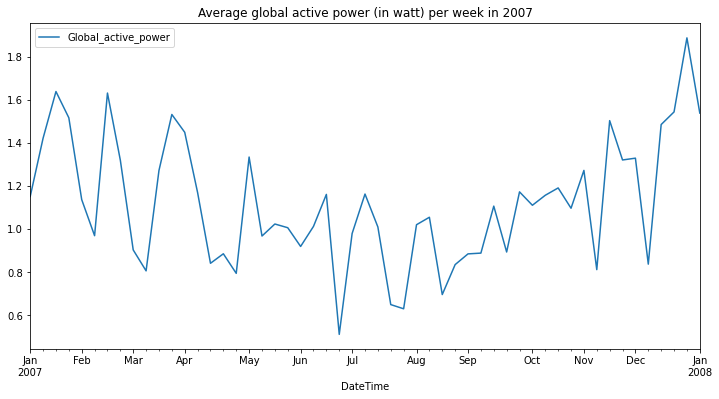

In [14]:
weekly_avg = active_power_df.resample("W").mean()
weekly_avg.plot(figsize=(12,6), title="Average global active power (in watt) per week in 2007")

#### Moving average of the daily average global active power (in watt) in 2007

<AxesSubplot:xlabel='DateTime'>

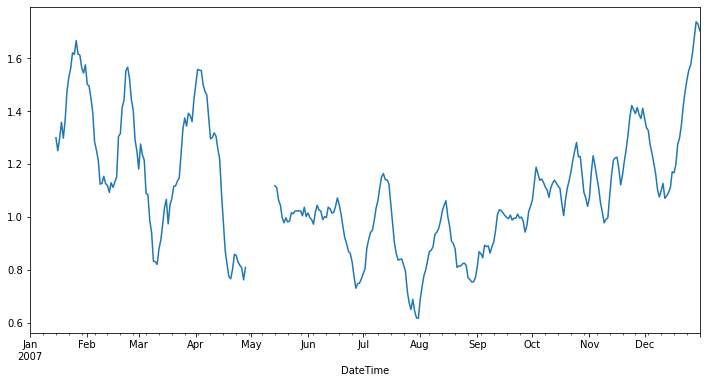

In [17]:
daily_avg = active_power_df.resample("D").mean()

sma_length = 15
sma = daily_avg["Global_active_power"].rolling(window=sma_length).mean()
sma.plot(figsize=(12,6))
# sma

#### Global active power per hour of the day in 2007

<AxesSubplot:title={'center':'Global active power per hour of the day in 2007'}, xlabel='DateTime'>

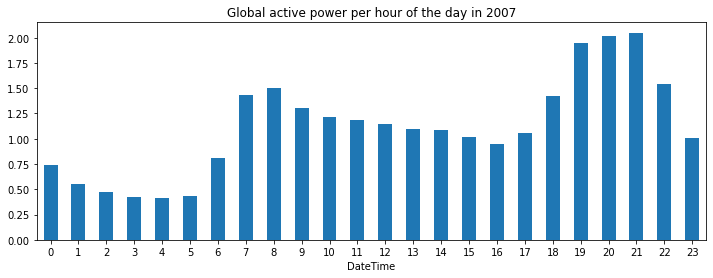

In [19]:
fig, axs = plt.subplots(figsize=(12, 4))

active_power_df.groupby(active_power_df.index.hour)["Global_active_power"].mean().plot(kind='bar', rot=0, ax=axs, title="Global active power per hour of the day in 2007")

#### Sub metering 1 (kitchen) per hour of the day

<AxesSubplot:xlabel='DateTime'>

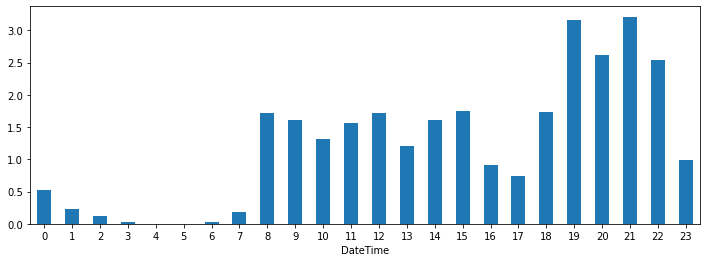

In [ ]:
sub1_df = df[['DateTime', 'Sub_metering_1']]
sub1_df_all = sub1_df.loc[sub1_df["DateTime"].dt.year == 2007]
sub1_df_all.set_index('DateTime', inplace=True)
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df_all.groupby(sub1_df_all.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 (kitchen) per hour of the business days

<AxesSubplot:xlabel='DateTime'>

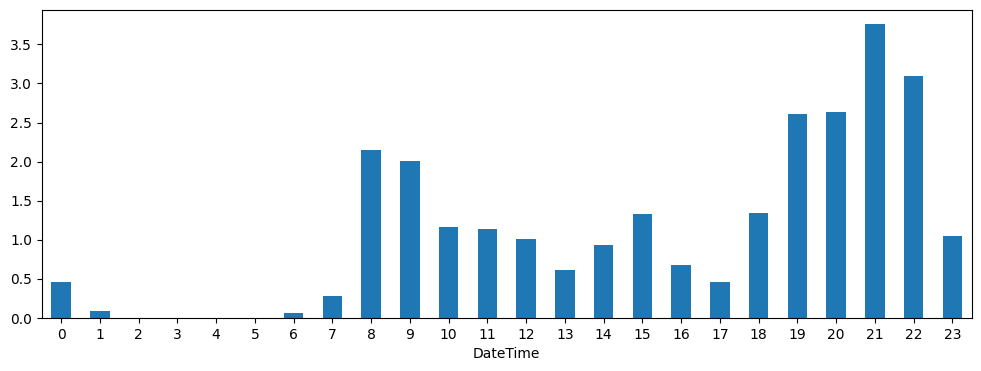

In [ ]:
sub1_df_bd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_bd.set_index('DateTime', inplace=True)
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df_bd.groupby(sub1_df_bd.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per hour on the weekends

<AxesSubplot:xlabel='DateTime'>

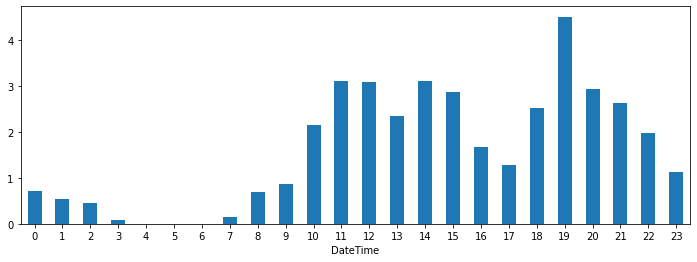

In [ ]:
sub1_df_we = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday.isin([5,6]))]
sub1_df_we.set_index('DateTime', inplace=True)
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df_we.groupby(sub1_df_we.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per hour of the holidays

<AxesSubplot:xlabel='DateTime'>

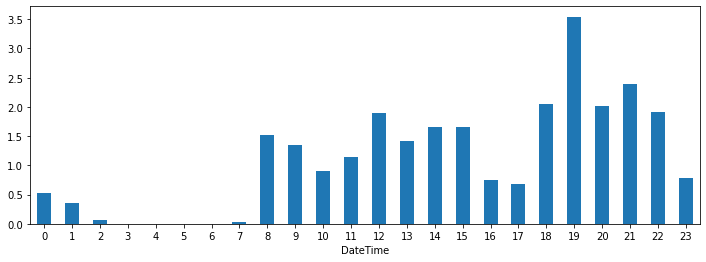

In [ ]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

sub1_df_hd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.date.isin(holidays))]
sub1_df_hd.set_index('DateTime', inplace=True)

fig, axs = plt.subplots(figsize=(12, 4))
sub1_df_hd.groupby(sub1_df_hd.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute

<AxesSubplot:xlabel='DateTime'>

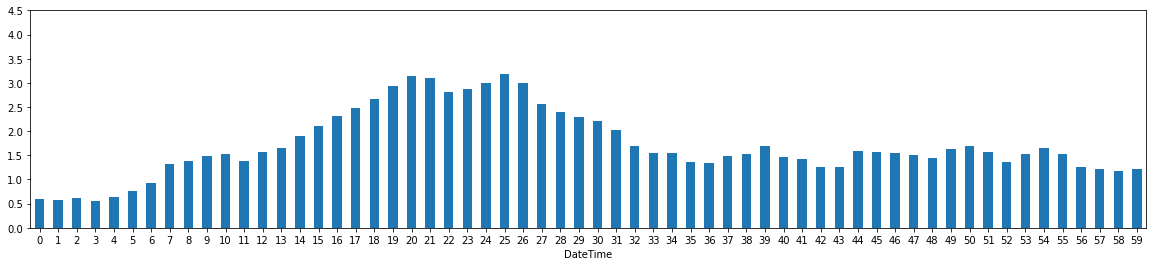

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_all.groupby([sub1_df_all.index.hour, sub1_df_all.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on business days

<AxesSubplot:xlabel='DateTime'>

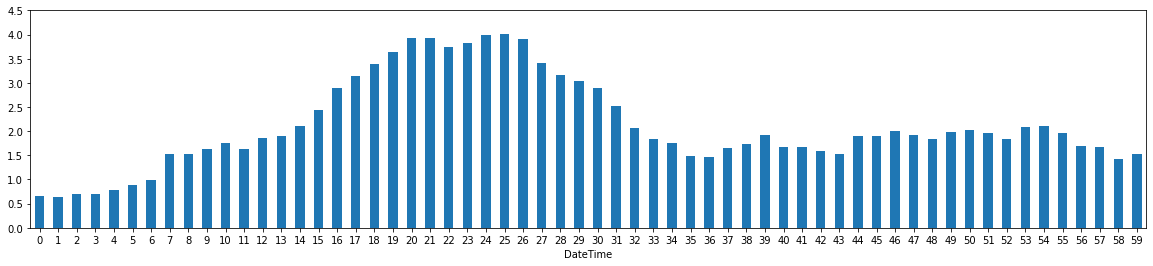

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on weekends

<AxesSubplot:xlabel='DateTime'>

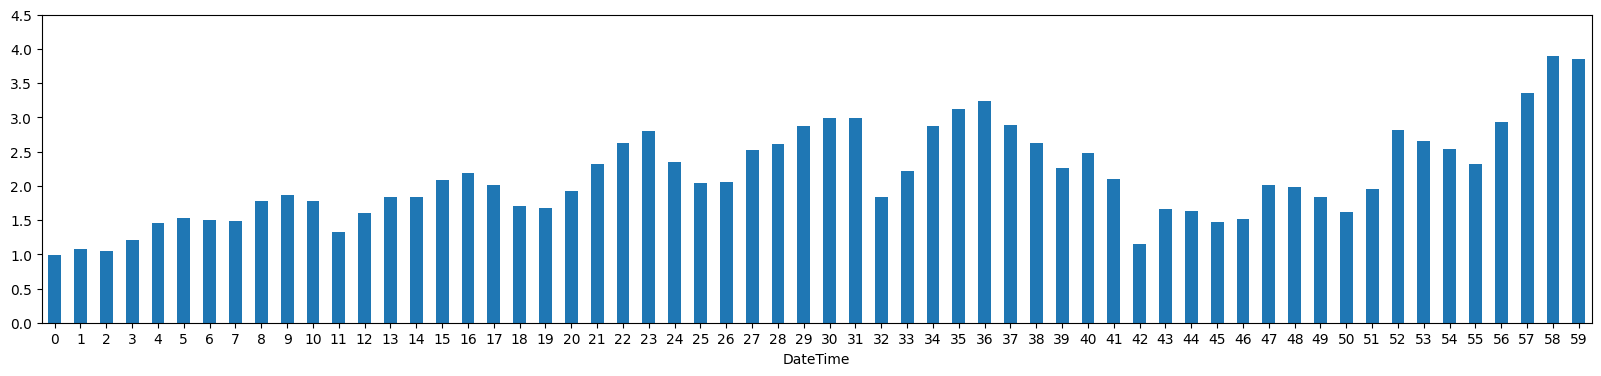

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_we.groupby([sub1_df_we.index.hour, sub1_df_we.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 per minute on holidays

<AxesSubplot:xlabel='DateTime'>

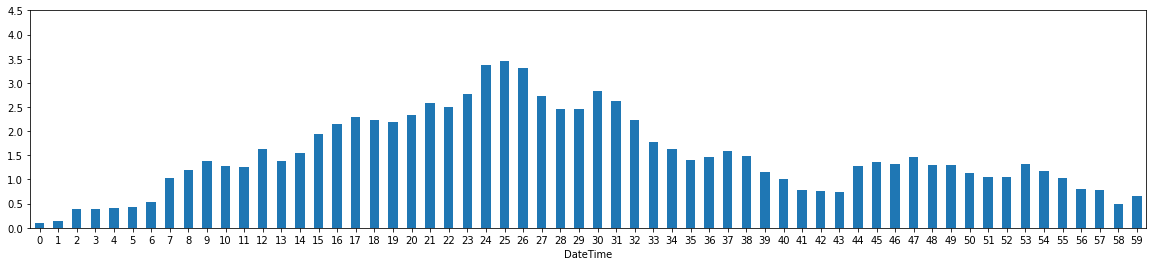

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df_hd.groupby([sub1_df_hd.index.hour, sub1_df_hd.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

<AxesSubplot:xlabel='DateTime'>

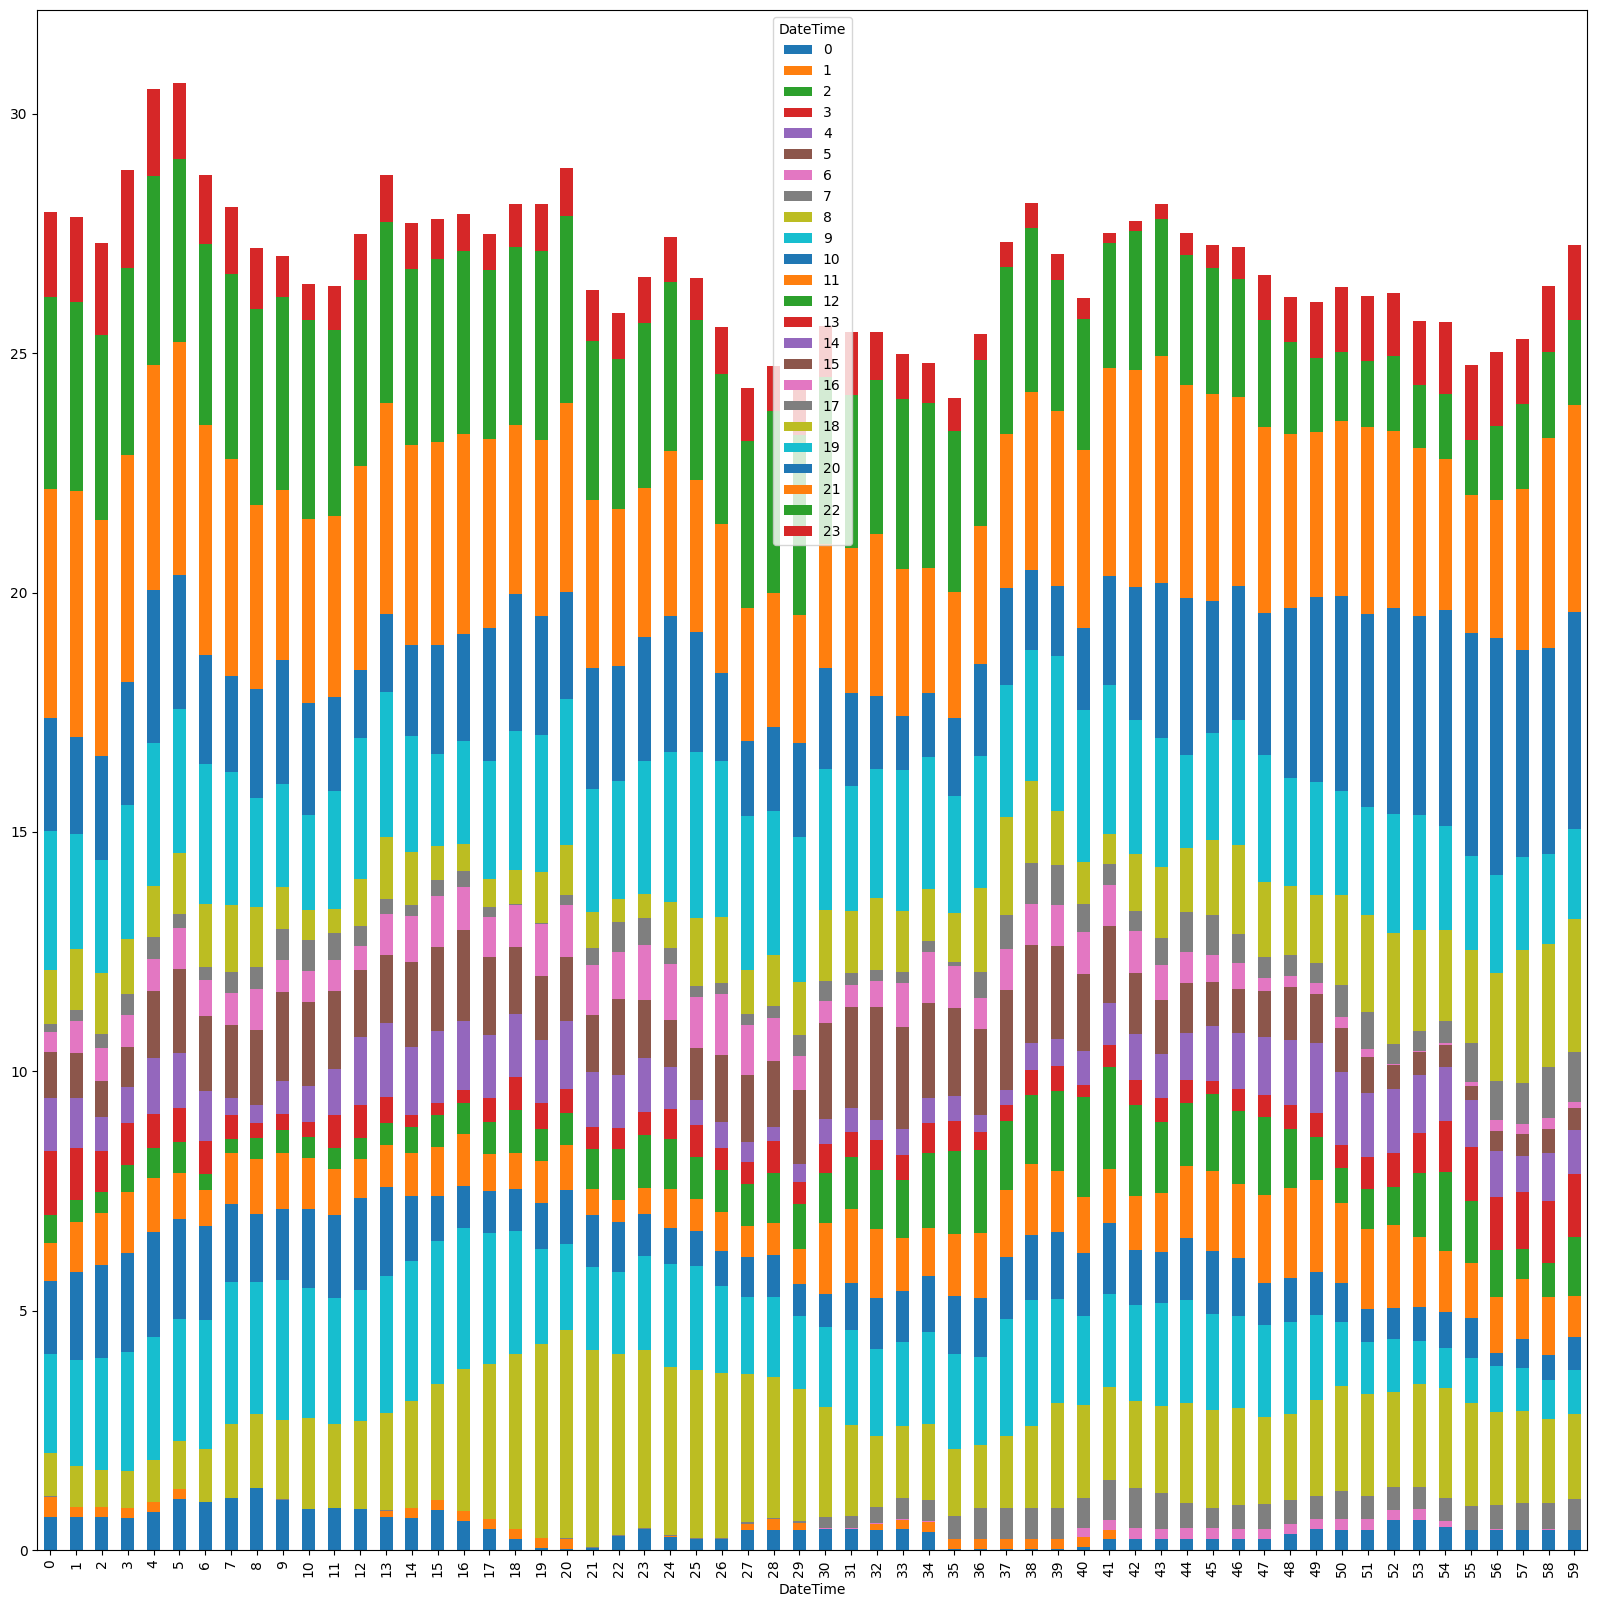

In [ ]:
import matplotlib
matplotlib.style.use('default')
group2 = sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean().unstack().transpose()
group2.plot(kind="bar", stacked=True,figsize=(20,20))


#### work in progress

<AxesSubplot:xlabel='DateTime'>

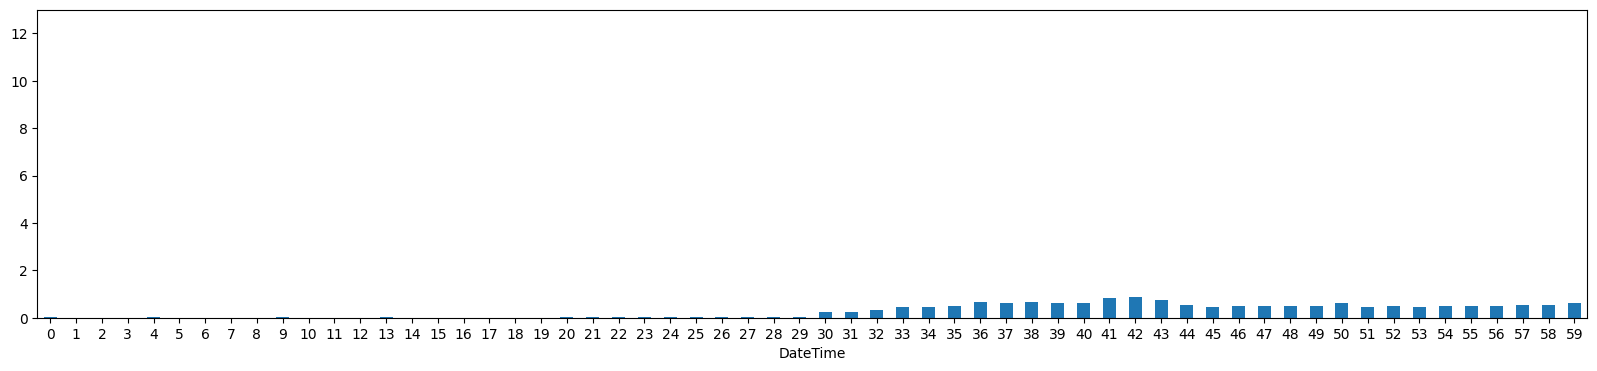

In [ ]:
sub1_df_bd_march = sub1_df_bd.loc[(sub1_df["DateTime"].dt.month == 3)]
cumul

# fig, axs = plt.subplots(figsize=(20, 4))
# axs.set_ylim([0, 13])
# sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute])["Sub_metering_1"].mean()[7].plot(kind='bar', rot=0, ax=axs)

Interpretation of the plot :
Sharp increase of power consumption around 8am, implies that the famsilly wakes up around 8 on week days

#### Sub metering 1 per hour of the weekend days

In [ ]:
sub1_df = df[['DateTime', 'Sub_metering_1']]
sub1_df = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & ((sub1_df["DateTime"].dt.weekday == 5) | (sub1_df["DateTime"].dt.weekday == 6))]
sub1_df.set_index('DateTime', inplace=True)

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df.groupby(sub1_df.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

### partie de theophile

In [ ]:
df_copy = df.copy().loc[df["DateTime"].dt.year == 2007]

df_copy.index = pd.to_datetime(df_copy['DateTime'])
df_copy = df_copy.drop(['DateTime'], axis=1)
df_grouped = df_copy.groupby(by=[df_copy.index.month,df_copy.index.week,df_copy()]).mean()
df_grouped.head(200)
#df.head()

<ipython-input-43-a3b257f52555>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_grouped = df_copy.groupby(by=[df_copy.index.month,df_copy.index.week]).mean()


Global_active_power  Global_reactive_power     Voltage  \
DateTime DateTime                                                           
1        1                    1.152170               0.109718  238.848376   
         2                    1.422602               0.146245  238.996149   
         3                    1.639451               0.136597  240.440150   
         4                    1.517470               0.106522  241.991723   
         5                    1.401438               0.123291  240.897201   
...                                ...                    ...         ...   
12       48                   1.159342               0.116612  240.818354   
         49                   0.838091               0.120684  238.886729   
         50                   1.486147               0.096026  241.223161   
         51                   1.544693               0.089493  242.717135   
         52                   1.888514               0.120793  242.152803   

                   Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime DateTime                                                     
1        1                 4.885524        1.068856        0.860105   
         2                 6.068642        2.438457        1.494035   
         3                 6.968413        2.324901        1.991567   
         4                 6.397440        1.138506        1.482588   
         5                 5.913565        0.519907        1.775000   
...                             ...             ...             ...   
12       48                4.906319        0.773264        0.290972   
         49                3.625992        0.762302        1.176091   
         50                6.239960        1.030655        2.054762   
         51                6.432880        1.273142        1.669610   
         52                7.888413        2.303075        2.433730   

                   Sub_metering_3  
DateTime DateTime                  
1        1               6.093263  
         2               6.925731  
         3               8.086508  
         4               7.149717  
         5               8.901620  
...                           ...  
12       48              6.872569  
         49              5.082639  
         50              8.114385  
         51              8.316004  
         52              8.441270  

[63 rows x 7 columns]

In [ ]:
df_copy2 = df.copy().loc[df["DateTime"].dt.year == 2008]
df_copy2.index = pd.to_datetime(df_copy2['DateTime'])
df_copy2 = df_copy2.drop(['DateTime'], axis=1)
daily_avg = df_copy2.resample("D").mean()


In [ ]:
temp_2008 = pd.read_csv("pre_processing/temperatures_2008.csv", sep=',', parse_dates=["Date"])
temp_2008 = temp_2008.set_index(daily_avg.index)
temp_2008 = temp_2008.drop(['Date'], axis = 1)
temp_2008.head()

,min_t,max_t
DateTime,,
2008-01-01,3.6,6.3
2008-01-02,0.1,2.7
2008-01-03,-1.4,6.1
2008-01-04,4.2,10.3
2008-01-05,6.2,9.5


In [ ]:
print(daily_avg.shape)
print(temp_2008.shape)

(366, 7)
(366, 2)


In [ ]:
daily_avg['min_temp'] = temp_2008['min_t']
daily_avg['max_temp'] = temp_2008['max_t']
daily_avg.head(100)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,min_temp,max_temp
DateTime,,,,,,,,,
2008-01-01,1.916485,0.098964,241.036674,7.978611,1.709028,1.902083,8.579861,3.6,6.3
2008-01-02,1.065731,0.124479,240.360271,4.517639,0.233333,0.194444,5.028472,0.1,2.7
2008-01-03,0.792969,0.073026,239.431514,3.277639,0.000000,0.893750,1.891667,-1.4,6.1
2008-01-04,1.478508,0.118331,241.615806,6.202500,0.749306,4.622917,10.079861,4.2,10.3
2008-01-05,0.400010,0.104650,241.446264,1.702361,0.000000,0.368056,1.795833,6.2,9.5
...,...,...,...,...,...,...,...,...,...
2008-04-05,1.021507,0.145432,241.380479,4.362500,1.525000,1.994444,3.794444,8.4,11.4
2008-04-06,1.103411,0.105836,234.706472,4.827778,1.076389,5.334722,4.519444,2.3,9.8
2008-04-07,0.654181,0.130647,240.179653,2.828333,0.000000,0.409028,5.765278,0.0,9.8


Global electic consumption = -0.01970275381965199*x + 1.3178072418696054


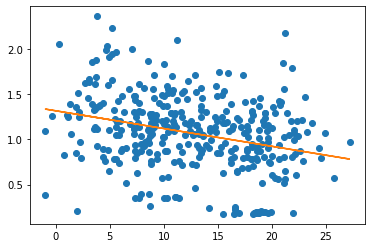

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = daily_avg['Global_active_power']

m, b = np.polyfit(x, y, 1)
print('Global electic consumption = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

active energy (consumed per minute) = -0.2831824831897965*x + 12.999537826740752


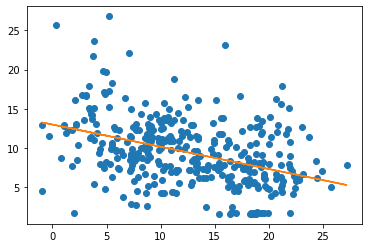

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']-daily_avg['Sub_metering_3']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

active energy of non measured electic devices + sub3= -0.325498733486341*x + 19.561370217947406


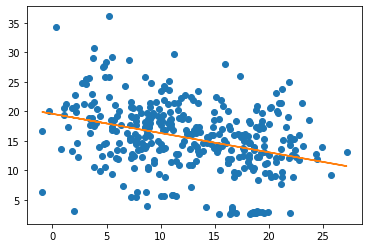

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices + sub3= {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
# from sklearn import datasets, svm, preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import OneHotEncoder

## Data loading

In [ ]:
df = pd.read_csv("data_analysis_2/dataset_traite.csv", sep=',', parse_dates=["DateTime"])

In [ ]:
df.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DateTime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 125.1 MB


## Data viz

In [ ]:
active_power_df = df[['DateTime', 'Global_active_power']]
active_power_df = active_power_df.loc[active_power_df["DateTime"].dt.year == 2007]
active_power_df.set_index('DateTime', inplace=True)
active_power_df

,Global_active_power
DateTime,
2007-01-01 00:00:00,2.580
2007-01-01 00:01:00,2.552
2007-01-01 00:02:00,2.550
2007-01-01 00:03:00,2.550
2007-01-01 00:04:00,2.554
...,...
2007-12-31 23:55:00,1.746
2007-12-31 23:56:00,1.732
2007-12-31 23:57:00,1.732


#### Average global active power (in watt) per week in 2007

<AxesSubplot:xlabel='DateTime'>

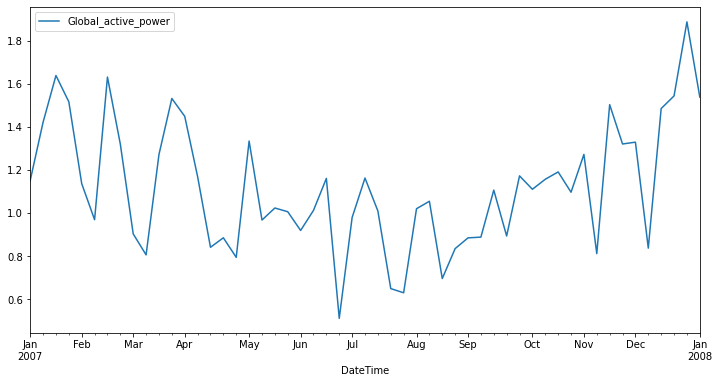

In [ ]:
weekly_avg = active_power_df.resample("W").mean()
weekly_avg.plot(figsize=(12,6))

#### Moving average of the daily average global active power (in watt) in 2007

<AxesSubplot:xlabel='DateTime'>

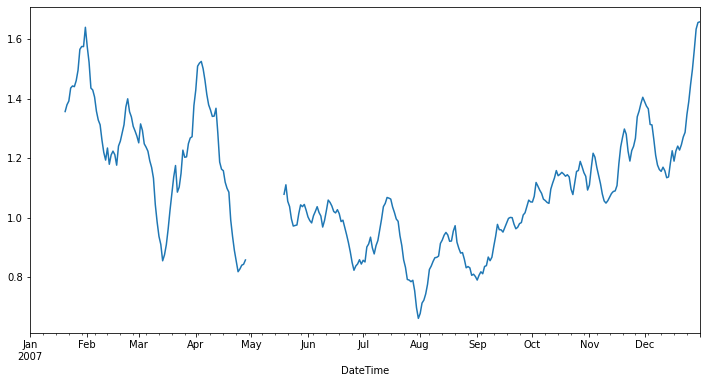

In [ ]:
daily_avg = active_power_df.resample("D").mean()

sma_length = 20
sma = daily_avg["Global_active_power"].rolling(window=sma_length).mean()
sma.plot(figsize=(12,6))
# sma

#### Global active power per hour of the day

<AxesSubplot:xlabel='DateTime'>

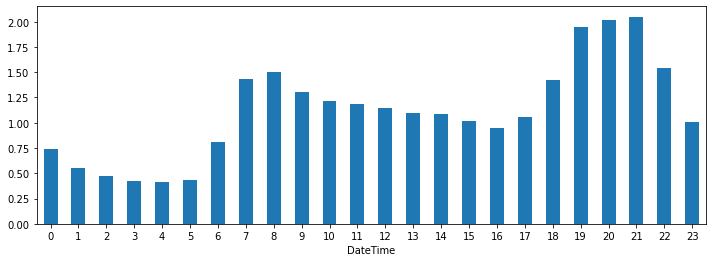

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

active_power_df.groupby(active_power_df.index.hour)["Global_active_power"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 (kitchen) per hour of the day

In [ ]:
sub1_df = df[['DateTime', 'Sub_metering_1']]
sub1_df = sub1_df.loc[sub1_df["DateTime"].dt.year == 2007]
sub1_df.set_index('DateTime', inplace=True)

<AxesSubplot:xlabel='DateTime'>

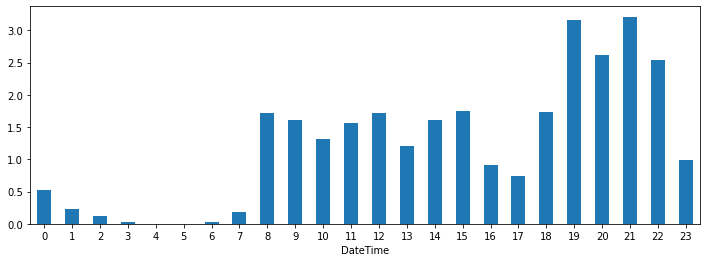

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df.groupby(sub1_df.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

#### Sub metering 1 (kitchen) per hour of the business days

In [ ]:
sub1_df = df[['DateTime', 'Sub_metering_1']]
sub1_df = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6)]
sub1_df.set_index('DateTime', inplace=True)

<AxesSubplot:xlabel='DateTime'>

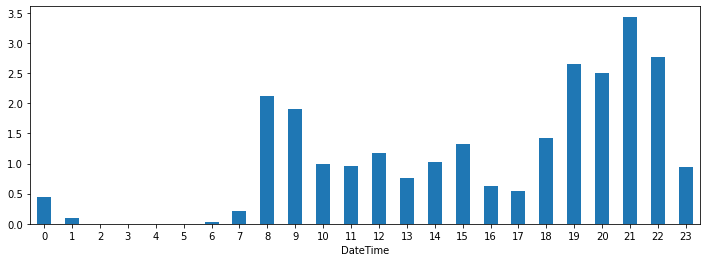

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df.groupby(sub1_df.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

<AxesSubplot:xlabel='DateTime'>

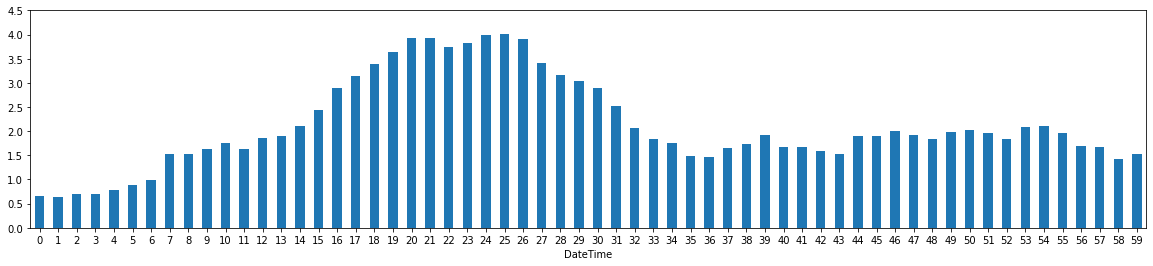

In [ ]:
sub1_df = df[['DateTime', 'Sub_metering_1']]
sub1_df = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6)]
sub1_df.set_index('DateTime', inplace=True)

fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 4.5])
sub1_df.groupby([sub1_df.index.hour, sub1_df.index.minute])["Sub_metering_1"].mean()[8].plot(kind='bar', rot=0, ax=axs)

<AxesSubplot:xlabel='DateTime'>

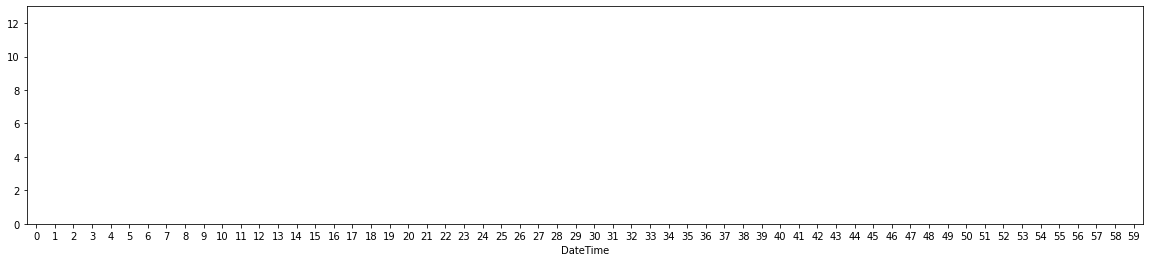

In [ ]:
sub1_df = df[['DateTime', 'Sub_metering_1']]
sub1_df = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & ((sub1_df["DateTime"].dt.weekday == 5) | (sub1_df["DateTime"].dt.weekday == 6))]
sub1_df.set_index('DateTime', inplace=True)

fig, axs = plt.subplots(figsize=(20, 4))
axs.set_ylim([0, 13])
sub1_df.groupby([sub1_df.index.hour, sub1_df.index.minute])["Sub_metering_1"].mean()[6].plot(kind='bar', rot=0, ax=axs)

In [ ]:
Interpretation of the plot :
Sharp increase of power consumption around 8am, implies that the famsilly wakes up around 8 on week days

#### Sub metering 1 per hour of the weekend days

In [ ]:
sub1_df = df[['DateTime', 'Sub_metering_1']]
sub1_df = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & ((sub1_df["DateTime"].dt.weekday == 5) | (sub1_df["DateTime"].dt.weekday == 6))]
sub1_df.set_index('DateTime', inplace=True)

<AxesSubplot:xlabel='DateTime'>

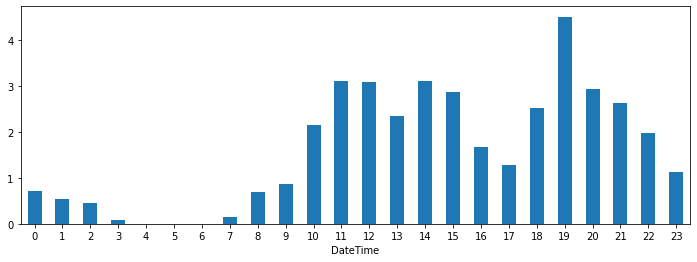

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

sub1_df.groupby(sub1_df.index.hour)["Sub_metering_1"].mean().plot(kind='bar', rot=0, ax=axs)

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, EasterMonday, Easter
from pandas.tseries.offsets import Day, CustomBusinessDay

class FrBusinessCalendar(AbstractHolidayCalendar):
    """ Custom Holiday calendar for France based on
        https://en.wikipedia.org/wiki/Public_holidays_in_France
      - 1 January: New Year's Day
      - Moveable: Easter Monday (Monday after Easter Sunday)
      - 1 May: Labour Day
      - 8 May: Victory in Europe Day
      - Moveable Ascension Day (Thursday, 39 days after Easter Sunday)
      - 14 July: Bastille Day
      - 15 August: Assumption of Mary to Heaven
      - 1 November: All Saints' Day
      - 11 November: Armistice Day
      - 25 December: Christmas Day
    """
    rules = [
        Holiday('New Years Day', month=1, day=1),
        EasterMonday,
        Holiday('Labour Day', month=5, day=1),
        Holiday('Victory in Europe Day', month=5, day=8),
        Holiday('Ascension Day', month=1, day=1, offset=[Easter(), Day(39)]),
        Holiday('Bastille Day', month=7, day=14),
        Holiday('Assumption of Mary to Heaven', month=8, day=15),
        Holiday('All Saints Day', month=11, day=1),
        Holiday('Armistice Day', month=11, day=11),
        Holiday('Christmas Day', month=12, day=25)
    ]

In [ ]:
year = 2007
start = datetime.date(year, 1, 1)
print(start)
end = datetime.date(year, 12, 30)
print(end)
cal = FrBusinessCalendar()
# Getting the holidays (off-days) between two dates
cal.holidays(start=start, end=end)

2007-01-01
2007-12-30


DatetimeIndex(['2007-01-01', '2007-04-09', '2007-05-01', '2007-05-08',
               '2007-05-17', '2007-07-14', '2007-08-15', '2007-11-01',
               '2007-11-11', '2007-12-25'],
              dtype='datetime64[ns]', freq=None)

### partie de theophile

In [ ]:
df_copy = df.copy().loc[df["DateTime"].dt.year == 2007]

df_copy.index = pd.to_datetime(df_copy['DateTime'])
df_copy = df_copy.drop(['DateTime'], axis=1)
df_grouped = df_copy.groupby(by=[df_copy.index.month,df_copy.index.week,df_copy()]).mean()
df_grouped.head(200)
#df.head()

<ipython-input-43-a3b257f52555>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_grouped = df_copy.groupby(by=[df_copy.index.month,df_copy.index.week]).mean()


Global_active_power  Global_reactive_power     Voltage  \
DateTime DateTime                                                           
1        1                    1.152170               0.109718  238.848376   
         2                    1.422602               0.146245  238.996149   
         3                    1.639451               0.136597  240.440150   
         4                    1.517470               0.106522  241.991723   
         5                    1.401438               0.123291  240.897201   
...                                ...                    ...         ...   
12       48                   1.159342               0.116612  240.818354   
         49                   0.838091               0.120684  238.886729   
         50                   1.486147               0.096026  241.223161   
         51                   1.544693               0.089493  242.717135   
         52                   1.888514               0.120793  242.152803   

                   Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime DateTime                                                     
1        1                 4.885524        1.068856        0.860105   
         2                 6.068642        2.438457        1.494035   
         3                 6.968413        2.324901        1.991567   
         4                 6.397440        1.138506        1.482588   
         5                 5.913565        0.519907        1.775000   
...                             ...             ...             ...   
12       48                4.906319        0.773264        0.290972   
         49                3.625992        0.762302        1.176091   
         50                6.239960        1.030655        2.054762   
         51                6.432880        1.273142        1.669610   
         52                7.888413        2.303075        2.433730   

                   Sub_metering_3  
DateTime DateTime                  
1        1               6.093263  
         2               6.925731  
         3               8.086508  
         4               7.149717  
         5               8.901620  
...                           ...  
12       48              6.872569  
         49              5.082639  
         50              8.114385  
         51              8.316004  
         52              8.441270  

[63 rows x 7 columns]

In [ ]:
df_copy2 = df.copy().loc[df["DateTime"].dt.year == 2008]
df_copy2.index = pd.to_datetime(df_copy2['DateTime'])
df_copy2 = df_copy2.drop(['DateTime'], axis=1)
daily_avg = df_copy2.resample("D").mean()


In [ ]:
temp_2008 = pd.read_csv("data_analysis_2/temperatures_2008.csv", sep=',', parse_dates=["Date"])
temp_2008 = temp_2008.set_index(daily_avg.index)
temp_2008 = temp_2008.drop(['Date'], axis = 1)
temp_2008.head()

,min_t,max_t
DateTime,,
2008-01-01,3.6,6.3
2008-01-02,0.1,2.7
2008-01-03,-1.4,6.1
2008-01-04,4.2,10.3
2008-01-05,6.2,9.5


In [ ]:
print(daily_avg.shape)
print(temp_2008.shape)

(366, 7)
(366, 2)


In [ ]:
daily_avg['min_temp'] = temp_2008['min_t']
daily_avg['max_temp'] = temp_2008['max_t']
daily_avg.head(100)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,min_temp,max_temp
DateTime,,,,,,,,,
2008-01-01,1.916485,0.098964,241.036674,7.978611,1.709028,1.902083,8.579861,3.6,6.3
2008-01-02,1.065731,0.124479,240.360271,4.517639,0.233333,0.194444,5.028472,0.1,2.7
2008-01-03,0.792969,0.073026,239.431514,3.277639,0.000000,0.893750,1.891667,-1.4,6.1
2008-01-04,1.478508,0.118331,241.615806,6.202500,0.749306,4.622917,10.079861,4.2,10.3
2008-01-05,0.400010,0.104650,241.446264,1.702361,0.000000,0.368056,1.795833,6.2,9.5
...,...,...,...,...,...,...,...,...,...
2008-04-05,1.021507,0.145432,241.380479,4.362500,1.525000,1.994444,3.794444,8.4,11.4
2008-04-06,1.103411,0.105836,234.706472,4.827778,1.076389,5.334722,4.519444,2.3,9.8
2008-04-07,0.654181,0.130647,240.179653,2.828333,0.000000,0.409028,5.765278,0.0,9.8


Global electic consumption = -0.01970275381965199*x + 1.3178072418696054


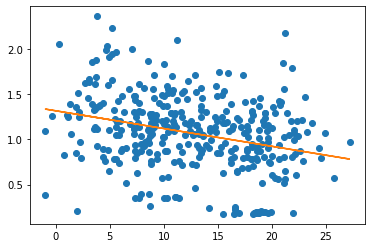

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = daily_avg['Global_active_power']

m, b = np.polyfit(x, y, 1)
print('Global electic consumption = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

active energy (consumed per minute) = -0.2831824831897965*x + 12.999537826740752


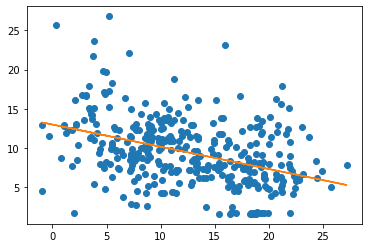

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']-daily_avg['Sub_metering_3']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices = {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)

active energy of non measured electic devices + sub3= -0.325498733486341*x + 19.561370217947406


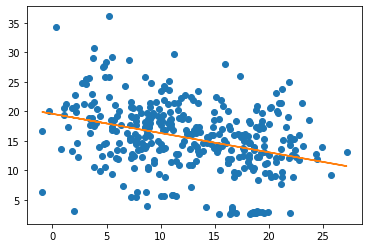

In [ ]:
x = (daily_avg['max_temp']+daily_avg['min_temp'])/2
y = (daily_avg['Global_active_power']*1000/60)-daily_avg['Sub_metering_1']-daily_avg['Sub_metering_2']

m, b = np.polyfit(x, y, 1)
print('active energy of non measured electic devices + sub3= {}*x + {}'.format(m,b)) 

plt.plot(x,y, linestyle='None',marker='o')
plt.plot(x, m*x+b)